In [1]:
#!pip install prophet

In [27]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [28]:
df = pd.read_csv("whiskey.csv")

In [29]:
df

,Year,Month,Relative Interest
0,2010,1,41
1,2010,2,42
2,2010,3,44
3,2010,4,41
4,2010,5,39
...,...,...,...
67,2015,8,69
68,2015,9,63
69,2015,10,65
70,2015,11,87


In [30]:
df.dtypes

Year                 int64
Month                int64
Relative Interest    int64
dtype: object

In [32]:
df['date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

In [33]:
df.dtypes

Year                  int64
Month                 int64
Relative Interest     int64
date                 object
dtype: object

In [34]:
df['date'] = pd.DatetimeIndex(df['date'])
df.head()

,Year,Month,Relative Interest,date
0,2010,1,41,2010-01-01
1,2010,2,42,2010-02-01
2,2010,3,44,2010-03-01
3,2010,4,41,2010-04-01
4,2010,5,39,2010-05-01


In [35]:
df.dtypes

Year                          int64
Month                         int64
Relative Interest             int64
date                 datetime64[ns]
dtype: object

In [36]:
df=df[["date","Relative Interest"]]
df.head()

,date,Relative Interest
0,2010-01-01,41
1,2010-02-01,42
2,2010-03-01,44
3,2010-04-01,41
4,2010-05-01,39


<AxesSubplot:xlabel='date'>

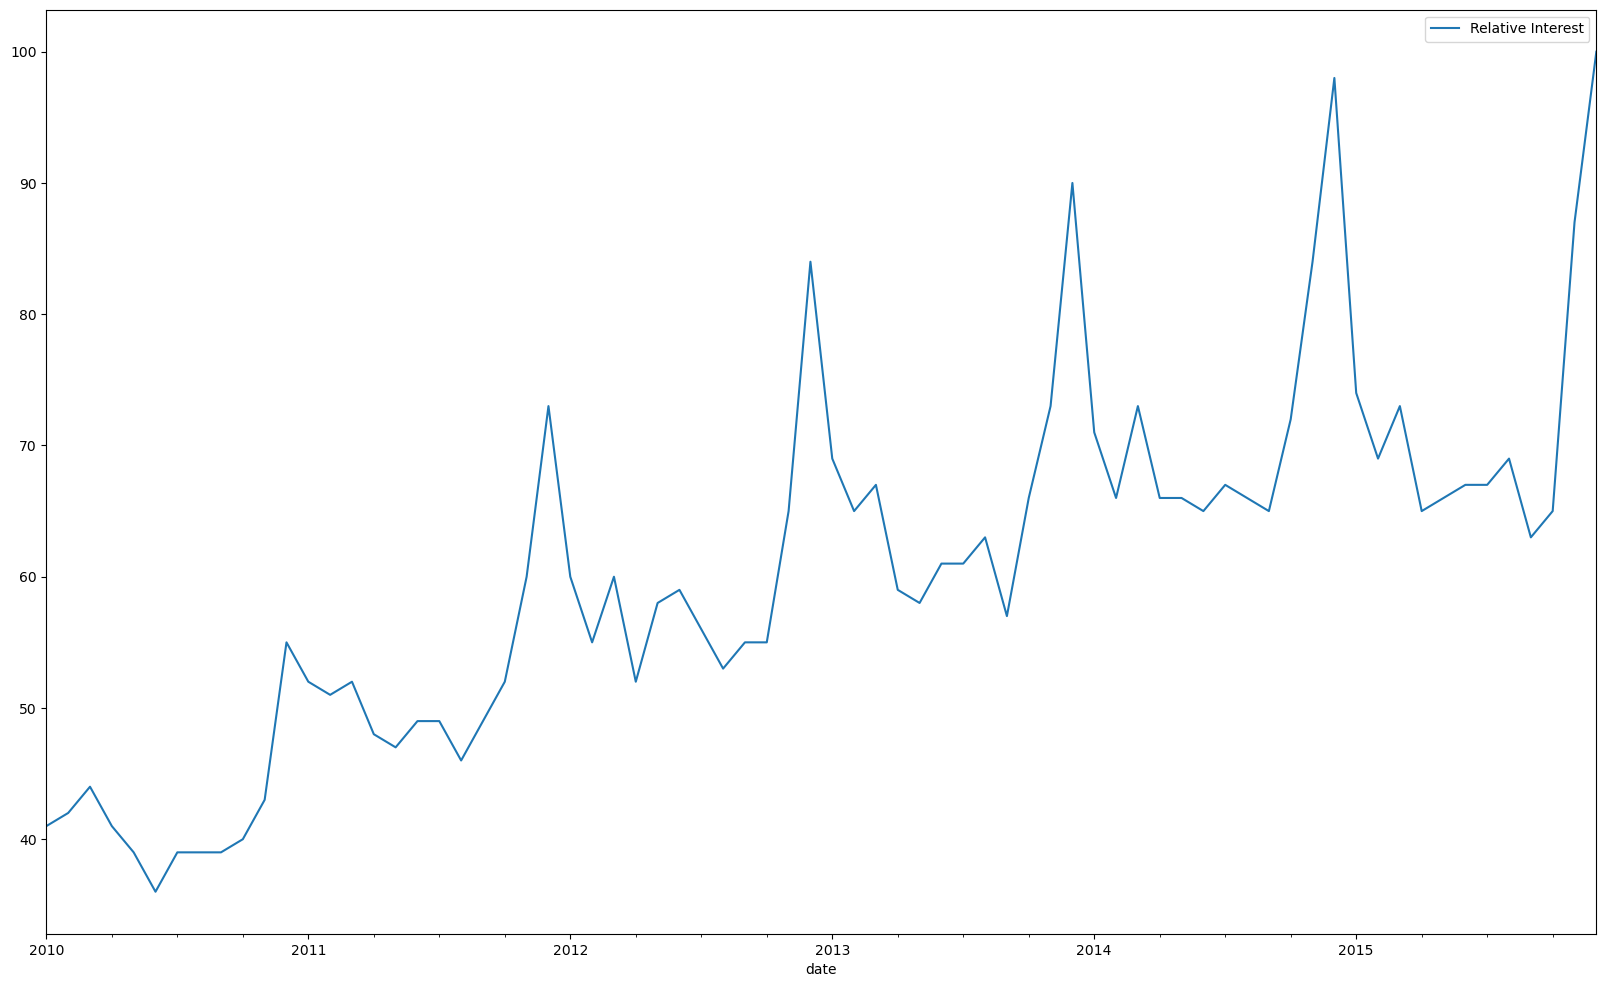

In [37]:
df.set_index('date').plot(figsize=(20, 12))

In [38]:
df.columns = ['ds','y']

In [39]:
df.tail()

,ds,y
67,2015-08-01,69
68,2015-09-01,63
69,2015-10-01,65
70,2015-11-01,87
71,2015-12-01,100


In [41]:
train = df.iloc[:len(df)-20]
test = df.iloc[len(df)-20:]

In [42]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=77,freq= 'MS') #MS for monthly, H for hourly
forecast = m.predict(future)

20:04:39 - cmdstanpy - INFO - Chain [1] start processing
20:04:39 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
future.tail()

,ds
124,2020-05-01
125,2020-06-01
126,2020-07-01
127,2020-08-01
128,2020-09-01


In [44]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
124,2020-05-01,107.245850,100.476870,110.375541,103.549868,111.495494,-2.124364,-2.124364,-2.124364,-2.124364,-2.124364,-2.124364,0.0,0.0,0.0,105.121487
125,2020-06-01,107.762150,101.881900,111.738815,103.990656,112.083964,-1.247227,-1.247227,-1.247227,-1.247227,-1.247227,-1.247227,0.0,0.0,0.0,106.514923
126,2020-07-01,108.261795,99.739097,109.918510,104.417407,112.667749,-3.565434,-3.565434,-3.565434,-3.565434,-3.565434,-3.565434,0.0,0.0,0.0,104.696360
127,2020-08-01,108.778094,99.064530,109.322919,104.845419,113.266596,-4.958720,-4.958720,-4.958720,-4.958720,-4.958720,-4.958720,0.0,0.0,0.0,103.819375
128,2020-09-01,109.294394,96.829201,107.543151,105.278678,113.848667,-7.373849,-7.373849,-7.373849,-7.373849,-7.373849,-7.373849,0.0,0.0,0.0,101.920545


In [45]:
df.tail()

,ds,y
67,2015-08-01,69
68,2015-09-01,63
69,2015-10-01,65
70,2015-11-01,87
71,2015-12-01,100


In [46]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
124,2020-05-01,105.121487,100.476870,110.375541
125,2020-06-01,106.514923,101.881900,111.738815
126,2020-07-01,104.696360,99.739097,109.918510
127,2020-08-01,103.819375,99.064530,109.322919
128,2020-09-01,101.920545,96.829201,107.543151


In [47]:
test.tail()

,ds,y
67,2015-08-01,69
68,2015-09-01,63
69,2015-10-01,65
70,2015-11-01,87
71,2015-12-01,100


In [48]:
plot_plotly(m ,forecast)

In [49]:
plot_components_plotly(m, forecast)

In [50]:
from statsmodels.tools.eval_measures import rmse

In [51]:
predictions = forecast.iloc[-20:]['yhat']

In [52]:

print("Mean Value of Test Dataset:", test['y'].mean())

Mean Value of Test Dataset: 72.4
